# **E-commerce Sales Data Analysis**

## **1. Business Objective** 

Customer segmentation enables a company to customize its relationships with the customers, as we do in our daily lives.

When we perform customer segmentation, we find similar characteristics in each customer’s behaviour and needs. Then, those are generalized into groups to satisfy demands with various strategies. Moreover, those strategies can be an input of the
  - Targeted marketing activities to specific groups
  - Launch of features aligning with the customer demand
  - Development of the product roadmap


Since we have a customer segmentation problem, we will apply machine learning techniques to create proper customer segmentations.

## **2. Data Collection**

This dataset from November 2018 — April 2019 is actual sales data courtesy of an e-commerce company.

In [101]:
# Connecting to Google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [103]:
# Setting up some parameters for the workbook

from pandas.plotting import scatter_matrix

pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.4f}'.format

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (25, 5)

In [217]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler

In [105]:
import datetime as dt

## **3. Data Preparation/Preprocessing**

We will start with loading and familiarizing with the dataset so that we can prepare the data for Machine Learning (ML) modelling.

In [106]:
# Loading the dataset

file_path = "/content/drive/My Drive/Colab Datasets/Retail Data/Orders - Analysis Task.csv"
orders = pd.read_csv(file_path)

In [107]:
# Checking the features and no. of records in the  dataset

print("The number of records are : ", orders.shape[0])
print("The number of features are : ", orders.shape[1])
print("The list of features is : ", orders.columns)
orders.head()

The number of records are :  70052
The number of features are :  17
The list of features is :  Index(['product_title', 'product_type', 'variant_title', 'variant_sku',
       'variant_id', 'customer_id', 'order_id', 'day', 'net_quantity',
       'gross_sales', 'discounts', 'returns', 'net_sales', 'taxes',
       'total_sales', 'returned_item_quantity', 'ordered_item_quantity'],
      dtype='object')


,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0000,-200.0000,0.0000,0.0000,0.0000,0.0000,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0000,-190.0000,0.0000,0.0000,0.0000,0.0000,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8000,-156.5600,-8.2400,0.0000,0.0000,0.0000,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0000,-119.0000,0.0000,0.0000,0.0000,0.0000,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0000,-119.0000,0.0000,0.0000,0.0000,0.0000,0,1


##### Observations:

There are 70K+ records and 17 features in the dataset.

### **3.1 Data Cleaning**

We will begin with data cleaning such that we can handle missing values, outliers, rare values and drop the unnecessary features that do not carry useful information.


In [108]:
# checking for duplicates

print("No. of duplicates records in the dataset : ", orders.columns.duplicated().sum())

No. of duplicates records in the dataset :  0


##### Observations:
There are no duplicate records in the dataset.

In [109]:
# Checking the columns' titles and datatypes

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           70052 non-null  object 
 1   product_type            70052 non-null  object 
 2   variant_title           70052 non-null  object 
 3   variant_sku             70052 non-null  object 
 4   variant_id              70052 non-null  int64  
 5   customer_id             70052 non-null  int64  
 6   order_id                70052 non-null  int64  
 7   day                     70052 non-null  object 
 8   net_quantity            70052 non-null  int64  
 9   gross_sales             70052 non-null  float64
 10  discounts               70052 non-null  float64
 11  returns                 70052 non-null  float64
 12  net_sales               70052 non-null  float64
 13  taxes                   70052 non-null  float64
 14  total_sales             70052 non-null

##### Observations:

There are mix of float, int and object features with possibly no missing values.

#### **3.1.1 Handling Missing Values**

Identifying the features that have some missing values and imputing them.

In [110]:
# Checking the columns' titles and datatypes

missing_stats = []

for col in orders.columns:
    missing_stats.append((col, orders[col].nunique(), orders[col].isnull().sum() / orders.shape[0], orders[col].value_counts(normalize=True, dropna=False).values[0], orders[col].dtype))
    
stats_df = pd.DataFrame(missing_stats, columns=['feature', 'unique_values', 'percent_missing', 'percent_biggest_cat', 'type'])
stats_df

,feature,unique_values,percent_missing,percent_biggest_cat,type
0,product_title,49,0.0000,0.1759,object
1,product_type,23,0.0000,0.3334,object
2,variant_title,371,0.0000,0.0813,object
3,variant_sku,7643,0.0000,0.0103,object
4,variant_id,1052,0.0000,0.0447,int64
5,customer_id,25543,0.0000,0.0009,int64
6,order_id,31220,0.0000,0.0006,int64
7,day,181,0.0000,0.0334,object
8,net_quantity,10,0.0000,0.8367,int64
9,gross_sales,149,0.0000,0.1763,float64


##### Observations:

Dataset is well-formatted and had no NA values as confirmed above.

### **3.2 Exploratory Data Analysis**

After the data cleaning steps, we can now perform EDA on the dataset to discover patterns and relationships that will help in understanding the data better.

### **3.2.1 Univariate Analysis**

Analyzing each feature inidividually to gain insights from the data and discover any outliers.

In [111]:
# Checking the feature "product_title" 

print("The no. of unique Product Title is : ", orders["product_title"].nunique())
print("The count of unique Product Title are : \n", orders["product_title"].value_counts())

The no. of unique Product Title is :  49
The count of unique Product Title are : 
 WHX    12320
YQX     7749
RJF     4665
XEB     4010
QID     3644
AYN     3430
KNB     3384
NMA     2892
LQS     2591
OTH     2072
OHR     1397
TSH     1345
CLH     1288
NWB     1249
MTW     1057
VXH      910
NSP      894
ZQV      893
FTU      866
QMB      778
EXR      771
KDP      752
LPZ      719
FQD      713
HZX      711
YMR      689
UQJ      679
RIH      606
AZN      582
CRH      571
OUT      567
RJK      541
JAF      528
OVT      522
INU      490
EYV      428
YYI      419
FMR      419
MAG      384
JYJ      309
ELV      277
DPR      266
EKJ      213
BKT      108
OJN       99
VTH       93
DAL       87
DFH       73
PRT        2
Name: product_title, dtype: int64


##### Observations:
1. "product_title" is a nominal feature with 3 character codes defining a product.
2. There are 49 unique Product titles in the dataset.
3. WHX and YQX are the two most popular product title.

In [112]:
# Checking the feature "product_type" 

print("The no. of unique Product Type is : ", orders["product_type"].nunique())
print("The count of unique Product Type are : \n", orders["product_type"].value_counts())

The no. of unique Product Type is :  23
The count of unique Product Type are : 
 Product P    23352
Product H    15963
Product D     7079
Product B     3510
Product N     3348
Product W     2677
Product A     2461
Product C     2456
Product R     2106
Product J     1549
Product O     1158
Product F     1055
Product Q      638
Product G      548
Product I      499
Product M      449
Product U      383
DPR            266
Product T      228
Product E      201
Product L      115
Product K       10
Product S        1
Name: product_type, dtype: int64


##### Observations:
1. "product_type" is a nominal feature that is defining/categorizing a product.
2. There are 23 unique Product type in the dataset.
3. Product P and Product H are the two most popular product type while Product S is the least popular with only one transaction.

In [113]:
# Checking the feature "variant_title" 

print("The no. of unique Variant Title is : ", orders["variant_title"].nunique())
print("The count of unique Variant Title are : \n", orders["variant_title"].value_counts())

The no. of unique Variant Title is :  371
The count of unique Variant Title are : 
 34 / B / FtO     5696
32 / A / FtO     4562
36 / B / FtO     3981
34 / A / FtO     3807
32 / B / FtO     3541
33 / B / FtO     3127
33 / A / FtO     2798
35 / B / FtO     2481
38 / B / FtO     2074
31 / A / FtO     1821
30 / A / FtO     1643
36 / A / FtO     1640
36 / C / FtO     1394
38 / C / FtO     1247
35 / A / FtO     1203
34 / C / FtO     1085
31 / B / FtO      969
40 / C / FtO      902
37 / B / FtO      891
40 / B / FtO      805
30 / B / FtO      792
38 / A / FtO      651
35 / C / FtO      567
33 / C / FtO      564
32 / C / FtO      486
37 / C / FtO      470
37 / A / FtO      461
M+ / Sl / Re      443
M / Sl / Re       412
XL / St / Re      408
L / St / Re       364
28 / A / FtO      337
L / Sl / Re       330
32 / A / 32       300
M+ / St / Re      296
32 / A / 31       287
34 / B / 32       286
S / Sl / Sh       234
M / Sl / Sh       216
M / St / Sh       215
40 / A / FtO      211
L / Sl / Lo   

##### Observations:
1. "variant_title" is also nominal feature which looks to define the different sizes and variations of the product.
2. There are 3 codes separated by a "/".
3. There are 371 unique values out of which "34 / B / FtO" is most popular with 5K+ records.

In [114]:
# Checking the feature "variant_sku" 

print("The no. of unique Variant Sku is : ", orders["variant_sku"].nunique())
print("The count of unique Variant Sku are : \n", orders["variant_sku"].value_counts())

The no. of unique Variant Sku is :  7643
The count of unique Variant Sku are : 
 4A-30E-267-CB3-1-506E7F7    724
93-BCE-0C8-1F0-0-CE76A69    686
76-BA0-289-04B-C-9EB5C4F    569
85-2EB-163-D62-5-FC50316    480
91-036-77F-B0C-A-F756CA7    469
                           ... 
39-8F6-244-27A-E-23721FE      1
96-A39-254-9B0-3-A5487E1      1
20-817-6AF-CE4-B-C1A4168      1
4F-BB3-2D1-A47-6-DB802B9      1
0C-7E9-AC4-FF8-C-37F6FBF      1
Name: variant_sku, Length: 7643, dtype: int64


##### Observations:
1. "variant_sku" is also a nominal feature that is unique id for product variant.
2. There are 7643 unique values for Variant SKU.

In [115]:
# Checking the feature "variant_id" 

print("The no. of unique Variant ID is : ", orders["variant_id"].nunique())
print("The count of unique Variant ID are : \n", orders["variant_id"].value_counts())

The no. of unique Variant ID is :  1052
The count of unique Variant ID are : 
 24064862    3134
22559066    2923
40522014    2468
88419828    2106
26922227    2103
            ... 
87233839       1
82502016       1
42093711       1
87366757       1
84715975       1
Name: variant_id, Length: 1052, dtype: int64


##### Observations:

1. "variant_id" is a nominal feature that describes a variant of the product.
2. There are 1052 unique Variant IDs in the dataset. 

In [116]:
# Checking the feature "customer_id" 

print("The no. of unique Customer ID is : ", orders["customer_id"].nunique())
print("The count of unique Customer ID are : \n", orders["customer_id"].value_counts())

The no. of unique Customer ID is :  25543
The count of unique Customer ID are : 
 8325158    63
2028611    59
6578818    44
1386862    37
1836343    36
           ..
2431511     1
2449944     1
6545251     1
8111968     1
2248348     1
Name: customer_id, Length: 25543, dtype: int64


##### Observations:
1. There are 25543 unique customers in the dataset.
2. It is a nominal feature with 7-numeric digits as codes for defining a customer id.

In [117]:
# Checking the feature "order_id" 

print("The no. of unique Order ID is : ", orders["order_id"].nunique())
print("The count of unique Order ID are : \n", orders["order_id"].value_counts())

The no. of unique Order ID is :  31220
The count of unique Order ID are : 
 13387642574062    44
58003641313301    39
25315581137286    35
54767986375983    33
58447036158188    32
                  ..
48514996627485     1
30236648260571     1
33188428863752     1
77016588754213     1
21544439271883     1
Name: order_id, Length: 31220, dtype: int64


##### Observations:

1. There are 31220 unique Order IDs in the dataset.
2. It is a nominal feature with a 14-digit unique IDs to define an Order.

In [118]:
# Cnverting the 

orders["day"] = pd.to_datetime(orders["day"], errors='coerce')
orders["day"] = orders["day"].dt.date

In [119]:
# Checking the feature "day" 
print("The no. of unique Days is : ", orders["day"].nunique())
print("The first day is : ", orders["day"].min())
print("The last day is : ", orders["day"].max())
print("The count of unique Days are : \n", orders["day"].value_counts())

The no. of unique Days is :  181
The first day is :  2018-01-11
The last day is :  2019-12-04
The count of unique Days are : 
 2018-11-23    2337
2018-11-26    1824
2019-02-01    1711
2018-12-26    1457
2019-08-03    1110
2018-11-24    1081
2019-04-27     820
2018-11-25     790
2019-04-28     789
2019-03-15     766
2018-12-14     703
2018-12-27     701
2019-03-01     678
2019-04-01     669
2019-04-26     654
2019-04-30     653
2018-12-24     652
2019-03-26     645
2019-01-15     641
2018-12-30     619
2019-04-25     610
2019-06-01     605
2018-11-19     573
2018-11-18     566
2019-09-01     562
2019-01-04     560
2018-12-28     551
2019-02-20     549
2018-11-20     537
2019-04-29     533
2019-04-22     505
2019-04-23     502
2018-04-11     491
2018-11-22     491
2018-11-16     489
2019-04-16     482
2018-11-17     482
2019-10-01     477
2018-12-19     476
2018-06-11     464
2019-04-24     453
2018-11-13     452
2019-03-22     433
2018-10-12     430
2019-12-04     429
2019-02-28     427

##### Observations:

1. It is date feature which captures the date when the order was made.
2. There are 181 unique dates when orders were made starting from 2018-1-11 to 2019-12-04.

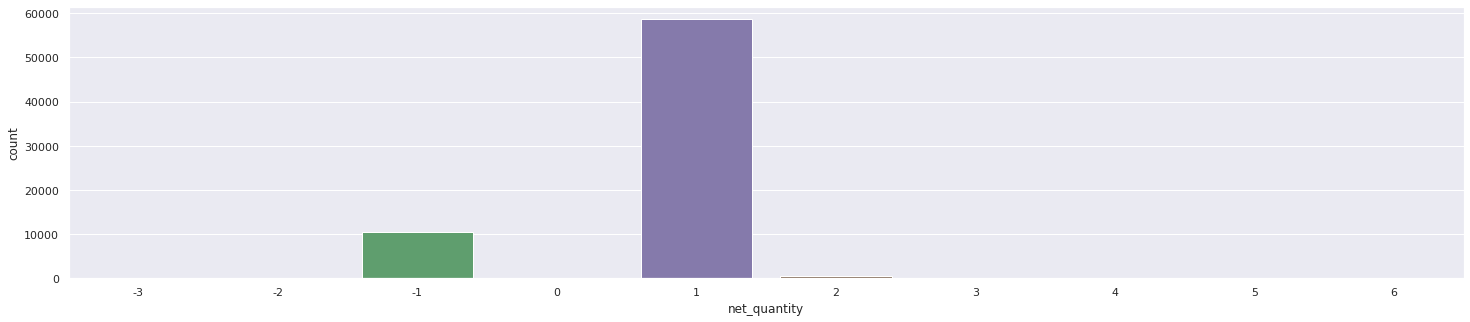

In [120]:
# Checking the feature "net_quantity" 

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.countplot("net_quantity", data=orders, ax=axes)
plt.show()

##### Observations:

1. "net_quantity" is an ordinal feature indicating the quantity of product that was purchased.
2. There are posiive as well as negative values in the dataset which could mean that the products were returned.
3. The customer is more prominent to order 1 quantity while there are very few instances of 2-6 quantities being ordered.
4. The returned quantities ranges from -1 to -3.

The basic statistic for the feature is :
 count   70052.0000
mean       61.7763
std        31.8007
min         0.0000
25%        51.6700
50%        74.1700
75%        79.1700
max       445.0000
Name: gross_sales, dtype: float64


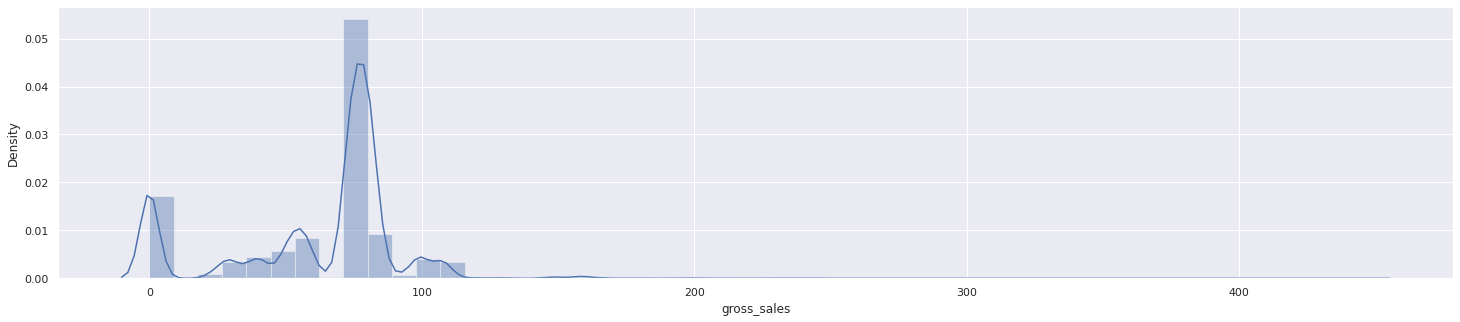

In [121]:
# Visualizing the distribution of "gross_sales"

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(orders["gross_sales"], ax=axes)
print("The basic statistic for the feature is :\n", orders["gross_sales"].describe())

##### Observations:

1. It is a continuous feature that captures the amount of gross sales for the product.
2. The min. value is 0 and max is 445 and shows a right-skewed distribution.
3. The median value is 74 while the mean value is 61.

The basic statistic for the feature is :
 count   70052.0000
mean       -4.9499
std         7.7700
min      -200.0000
25%        -8.3400
50%         0.0000
75%         0.0000
max         0.0000
Name: discounts, dtype: float64


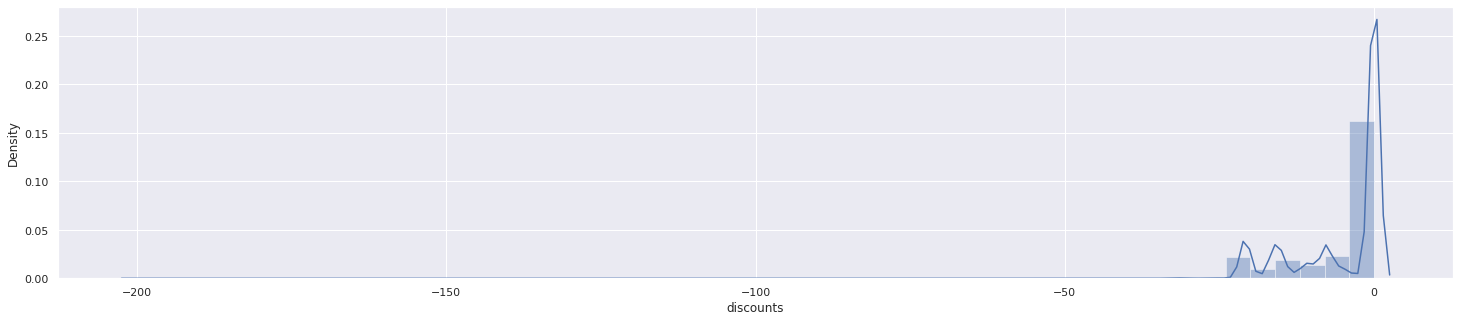

In [122]:
# Visualizing the distribution of "discounts"

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(orders["discounts"], ax=axes)
print("The basic statistic for the feature is :\n", orders["discounts"].describe())

##### Observations:

1. It is a continuous feature that captures the amount of discount for the product.
2. The min. value is -200 and max is 0 and shows a left-skewed distribution.
3. The median value is 0 while the mean value is -5.

The basic statistic for the feature is :
 count   70052.0000
mean      -10.2461
std        25.1547
min      -237.5000
25%         0.0000
50%         0.0000
75%         0.0000
max         0.0000
Name: returns, dtype: float64


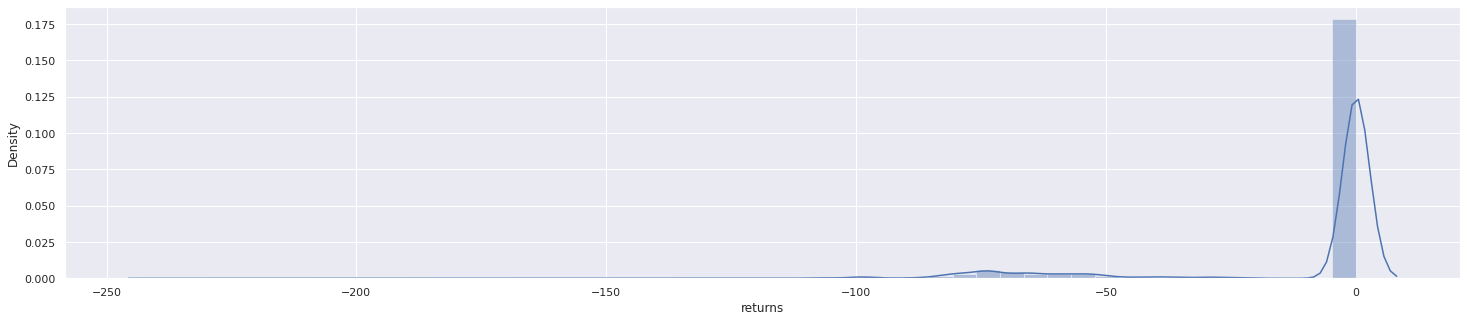

In [123]:
# Visualizing the distribution of "returns"

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(orders["returns"], ax=axes)
print("The basic statistic for the feature is :\n", orders["returns"].describe())

##### Observations:

1. It is a continuous feature that is the difference between gross sales and discounts, which signifies the returns needs to be made if the item is returned.
2. Most of the values are 0 but there are few negative values.

The basic statistic for the feature is :
 count   70052.0000
mean       46.5803
std        51.8027
min      -237.5000
25%        47.0800
50%        63.3300
75%        74.1700
max       445.0000
Name: net_sales, dtype: float64


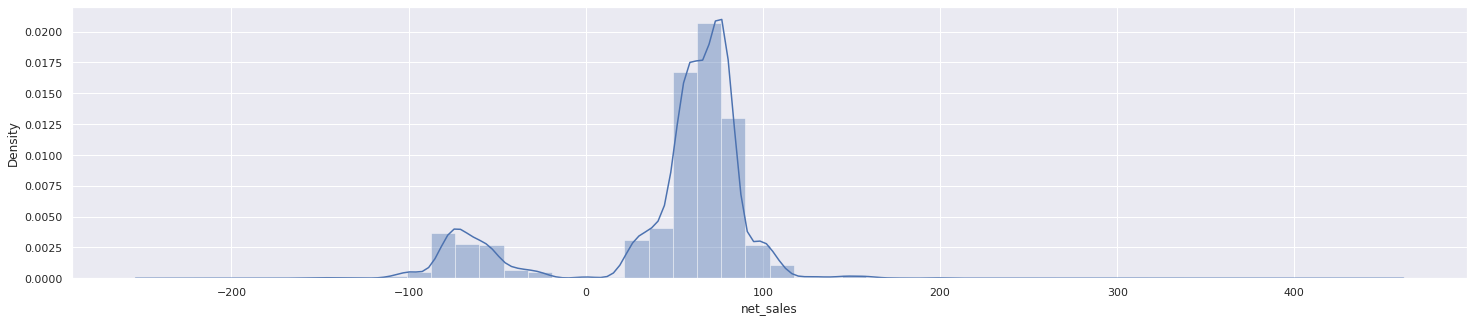

In [124]:
# Visualizing the distribution of "net_sales"

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(orders["net_sales"], ax=axes)
print("The basic statistic for the feature is :\n", orders["net_sales"].describe())

##### Observations:

1. It is the continuous feature showing the net monetary sales value generated.
2. It is the difference of gross sales and discounts, which will be the effective cost of the item to be paid.
3. The negative sales might signify that item is returned back rather than ordered.
4. The min value is -237 and max value is 445. 

The basic statistic for the feature is :
 count   70052.0000
mean        9.1236
std        10.3052
min       -47.5000
25%         8.3750
50%        12.6600
75%        14.8400
max        63.3400
Name: taxes, dtype: float64


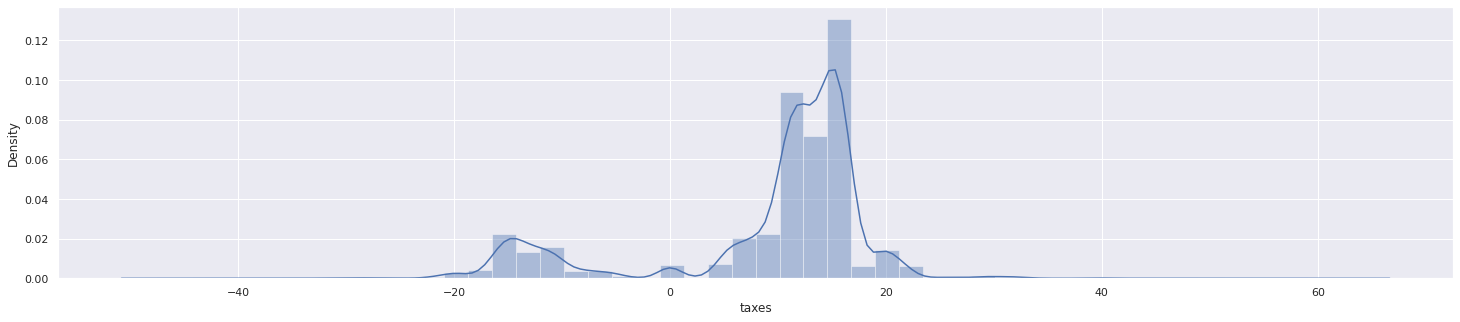

In [125]:
# Visualizing the distribution of "taxes"

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(orders["taxes"], ax=axes)
print("The basic statistic for the feature is :\n", orders["taxes"].describe())

##### Observations:

1. The feature "taxes" shows that taxes to be paid on the purchase.
2. The min value is -47.5 and max value is 63.34.
3. The median value is 12.6 and mean value is 9.12.

The basic statistic for the feature is :
 count   70052.0000
mean       55.7040
std        61.9206
min      -285.0000
25%        56.2275
50%        76.0000
75%        89.0000
max       445.0000
Name: total_sales, dtype: float64


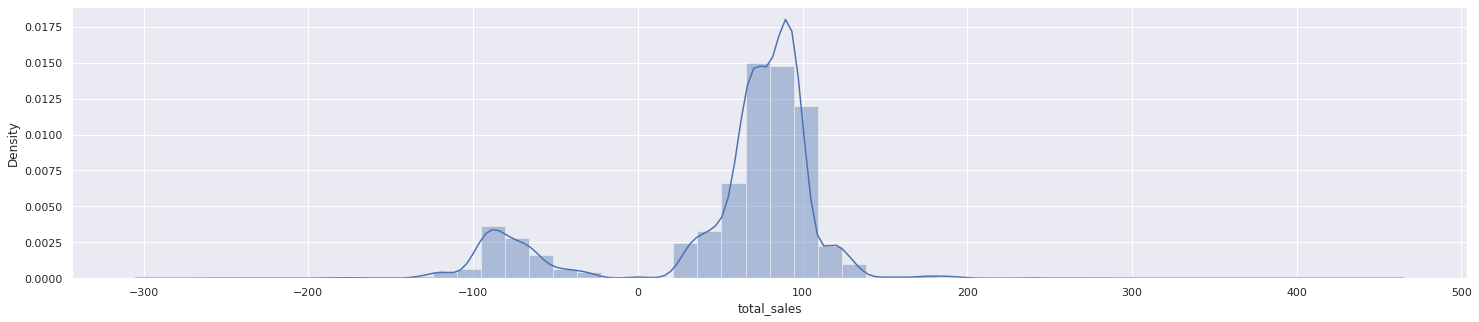

In [126]:
# Visualizing the distribution of "total_sales"

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(orders["total_sales"], ax=axes)
print("The basic statistic for the feature is :\n", orders["total_sales"].describe())

##### Observations:

1. It is a continuous feature that is the sum of net_sales and taxes to calculate the total_sales value for te product.
2. The min value is -285 and max value is 445.
3. The mean is 55.7 and median is 76.

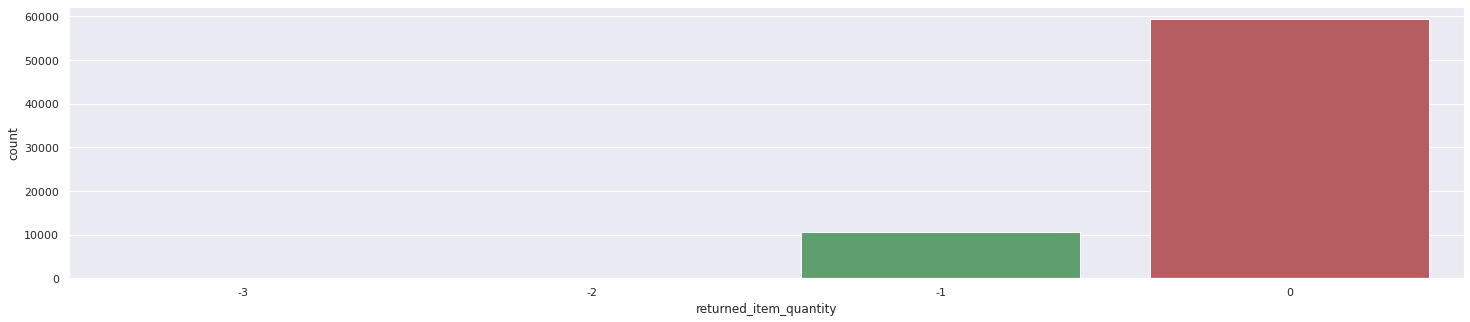

In [127]:
# Checking the feature "returned_item_quantity" 

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.countplot("returned_item_quantity", data=orders, ax=axes)
plt.show()

##### Observations:

1. It is an ordinal feature that shows the quantity of items returned.
2. Mostly there are no quantity returned but there are significant returns of -1 items. -2 and -3 also present in feature.

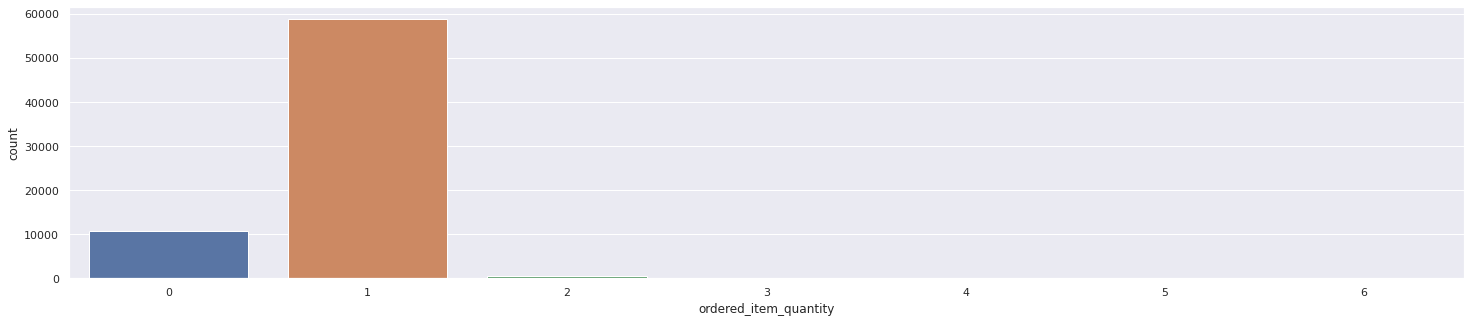

In [128]:
# Checking the feature "ordered_item_quantity" 

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.countplot("ordered_item_quantity", data=orders, ax=axes)
plt.show()

##### Observations:

1. It is an ordinal feature which shows the ordered quantity of the item.
2. The feature contains value form 0 to 6.
3. 1 and 0 are two frequent quantity of items ordered.

In [129]:
orders.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,2018-04-12,2,200.0000,-200.0000,0.0000,0.0000,0.0000,0.0000,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,2019-01-04,2,190.0000,-190.0000,0.0000,0.0000,0.0000,0.0000,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,2018-05-11,0,164.8000,-156.5600,-8.2400,0.0000,0.0000,0.0000,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,2019-02-19,1,119.0000,-119.0000,0.0000,0.0000,0.0000,0.0000,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,2019-02-19,1,119.0000,-119.0000,0.0000,0.0000,0.0000,0.0000,0,1


### **3.2.2 Bi-variate Analysis**

Analyzing multiple features together to discover relations, correlations and patterns. 

**1. Analyzing Order with "net_quantity" less than 0**

In [130]:
# Selecting the records with "net_quantity" as less than 0

negative_orders = orders[orders["net_quantity"] < 0]
print("The no. of records with negative net quantity is :", len(negative_orders))

The no. of records with negative net quantity is : 10715


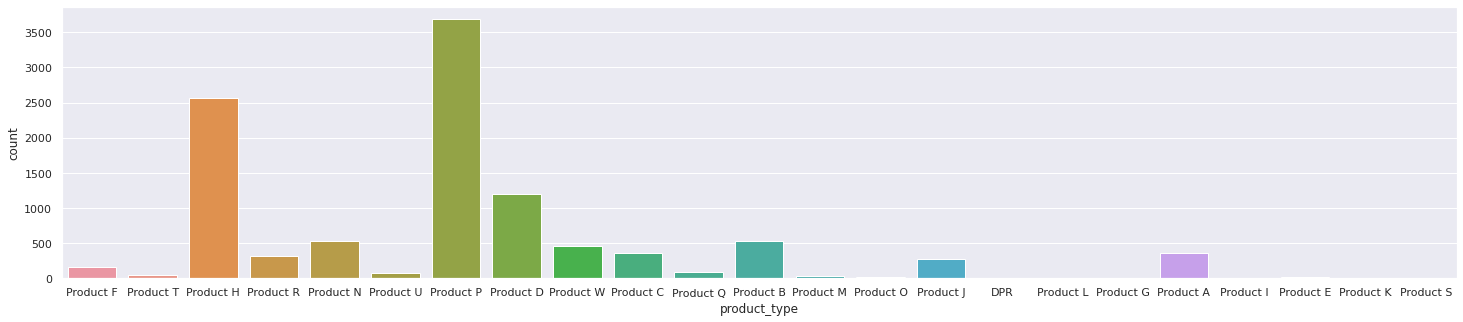

In [131]:
# Checking the feature "ordered_item_quantity" 

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.countplot("product_type", data=negative_orders, ax=axes)
plt.show()

In [132]:
# Checking the "customer_id" to get the idea of customers who have returned the most

negative_orders.groupby("customer_id")["net_quantity"].sum().sort_values().reset_index()

,customer_id,net_quantity
0,8325158,-26
1,2028611,-20
2,9712534,-18
3,1836343,-16
4,1527995,-15
...,...,...
6437,4765339,-1
6438,4764305,-1
6439,4762985,-1
6440,4769813,-1


##### Observations:

1. There are 10K+ records that contain negative net quantity.
2. Out of all the Product Types, most of them have negative quantities which means they were returned by customers.
3. It seems that the cancellation is more likely to be dependent on the number of sales of the product.
4. Out of all the customer, there are 6442 customers who have returned items back.
5. Customer IDs 8325158, 2028611 are the ones who have returned the highest, 26 and 20 respectively.

In [133]:
negative_orders[["net_quantity", "gross_sales", "discounts", "returns", "net_sales", "taxes", "total_sales", "returned_item_quantity", "ordered_item_quantity"]].describe()

,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
count,10715.0000,10715.0000,10715.0000,10715.0000,10715.0000,10715.0000,10715.0000,10715.0000,10715.0000
mean,-1.0140,0.0000,0.0000,-66.6047,-66.6047,-13.1769,-79.7816,-1.0140,0.0000
std,0.1237,0.0000,0.0000,18.9729,18.9729,3.9641,22.6680,0.1237,0.0000
min,-3.0000,0.0000,0.0000,-237.5000,-237.5000,-47.5000,-285.0000,-3.0000,0.0000
25%,-1.0000,0.0000,0.0000,-74.1700,-74.1700,-14.8400,-89.0000,-1.0000,0.0000
50%,-1.0000,0.0000,0.0000,-66.7500,-66.7500,-13.3500,-80.1000,-1.0000,0.0000
75%,-1.0000,0.0000,0.0000,-55.0000,-55.0000,-11.0000,-66.0000,-1.0000,0.0000
max,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,0.0000


In [134]:
# Checking the orders that have 0 sales value

negative_orders[negative_orders["total_sales"] == 0 ]

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
59295,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,13666410519728,2019-01-03,-1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1,0
59300,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,2019-02-23,-1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1,0
59305,RJF,Product T,28 / A / 9,4D-D1F-A14-8D9-0-FD0E84A,31355561,3715657,93146430228825,2018-04-12,-1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1,0
59314,OTH,Product F,40 / B / FtO,53-5CA-7CF-8F5-9-28CB78B,43823868,4121004,53616575668264,2019-02-23,-1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1,0
59328,YQX,Product H,40 / B / FtO,F2-055-4C3-8C3-0-7070F1D,25826279,4121004,13666410519728,2019-01-03,-1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1,0


In [135]:
# Checking the total sum of sales value returned by the customers

print("The total sum of sales value returned is : ", negative_orders["total_sales"].sum())

The total sum of sales value returned is :  -854859.92


In [136]:
# Checking the "customer_id" to get the idea of total_sales value of returned item

negative_orders.groupby("customer_id")["net_sales"].sum().sort_values().reset_index()

,customer_id,net_sales
0,8325158,-1846.2600
1,9712534,-1351.6700
2,2028611,-1219.2900
3,1527995,-1068.7500
4,2594954,-973.3400
...,...,...
6437,8657797,-21.7500
6438,3387009,-20.5300
6439,5140753,-19.2200
6440,3715657,0.0000


In [137]:
# Checking the "product_type" to get the idea of total_sales value of returned item

negative_orders.groupby(by=["product_type"])["net_sales"].sum().sort_values().reset_index()

,product_type,net_sales
0,Product P,-252525.8200
1,Product H,-168178.7800
2,Product D,-78133.3300
3,Product B,-38551.4200
4,Product A,-34482.5800
5,Product W,-31258.5400
6,Product J,-26948.6500
7,Product C,-23984.8200
8,Product N,-20510.2100
9,Product F,-14067.8000


In [138]:
negative_orders.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
59295,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,13666410519728,2019-01-03,-1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1,0
59300,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,2019-02-23,-1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1,0
59305,RJF,Product T,28 / A / 9,4D-D1F-A14-8D9-0-FD0E84A,31355561,3715657,93146430228825,2018-04-12,-1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1,0
59314,OTH,Product F,40 / B / FtO,53-5CA-7CF-8F5-9-28CB78B,43823868,4121004,53616575668264,2019-02-23,-1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1,0
59328,YQX,Product H,40 / B / FtO,F2-055-4C3-8C3-0-7070F1D,25826279,4121004,13666410519728,2019-01-03,-1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1,0


##### Observations:

1. The quantities returned varies from -1 to -3 items.
2. The returned items sale value is represented in the net_sales feature in negative value. The max. value is 0 and min. value is -237.5.
3. There are 5 records of returned items that have 0 sales value. This seems suspicious though, but could be possible.
4. The total sum of sales value of the returned items is 854K+.
5. The customer id 8325158, 9712534, 2028611 and 1527995 have returned items worth more than 1000. They are the same customers who have bought the most no. of items.
6. Product P and Product H are the two product types with highest sales value for returned items.

---

**2. Analyzing orders where net quantity is 0**

In [139]:
# Filtering records with 0 net quantity

zero_orders = orders[orders["net_quantity"] == 0]
print("The no. of records with 0 net quantity is :", len(zero_orders))

The no. of records with 0 net quantity is : 68


In [140]:
# Checking the basic statistics for zero orders

zero_orders[["net_quantity", "gross_sales", "discounts", "returns", "net_sales", "taxes", "total_sales", "returned_item_quantity", "ordered_item_quantity"]].describe()

,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
count,68.0000,68.0000,68.0000,68.0000,68.0000,68.0000,68.0000,68.0000,68.0000
mean,0.0000,70.8929,-10.7854,-60.1075,0.0000,0.0000,0.0000,-1.0294,1.0294
std,0.0000,22.8786,27.0053,25.4481,0.0000,0.0000,0.0000,0.1702,0.1702
min,0.0000,24.1700,-156.5600,-142.5000,0.0000,0.0000,0.0000,-2.0000,1.0000
25%,0.0000,59.0000,-8.2150,-74.1700,0.0000,0.0000,0.0000,-1.0000,1.0000
50%,0.0000,74.1700,0.0000,-60.9000,0.0000,0.0000,0.0000,-1.0000,1.0000
75%,0.0000,79.1700,0.0000,-55.4175,0.0000,0.0000,0.0000,-1.0000,1.0000
max,0.0000,164.8000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,2.0000


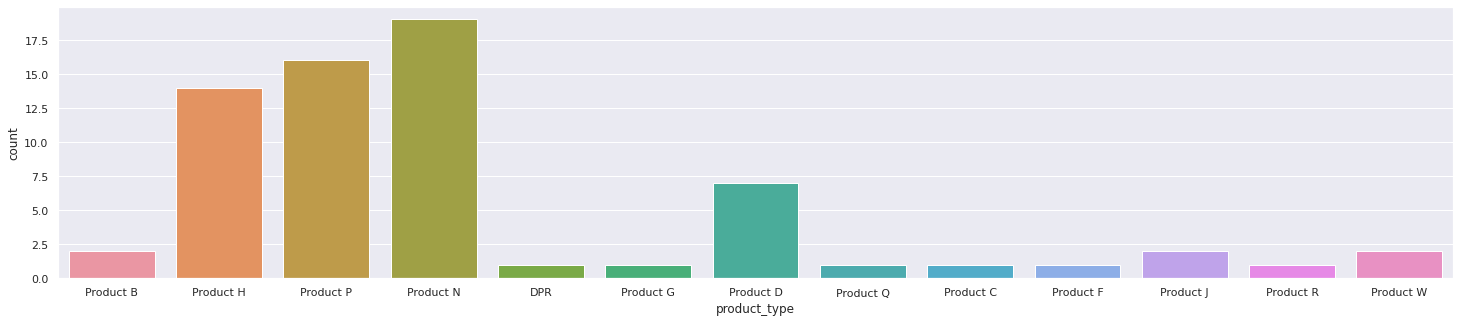

In [141]:
# Checking the feature "ordered_item_quantity" 

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.countplot("product_type", data=zero_orders, ax=axes)
plt.show()

In [142]:
zero_orders.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,2018-05-11,0,164.8000,-156.5600,-8.2400,0.0000,0.0000,0.0000,-2,2
22,KNB,Product H,28 / B / 29,BA-184-06C-4E3-6-1DC738F,10434338,1481447,82857371444896,2018-09-11,0,89.0000,-89.0000,0.0000,0.0000,0.0000,0.0000,-1,1
23,EYV,Product H,31 / A / FtO,E5-666-054-F18-A-90F6B20,22559066,3619130,88025805105285,2018-11-13,0,89.0000,-89.0000,0.0000,0.0000,0.0000,0.0000,-1,1
30,WHX,Product P,32 / B / FtO,85-2EB-163-D62-5-FC50316,26246865,9533448,73094559597229,2018-05-11,0,74.2000,-70.4900,-3.7100,0.0000,0.0000,0.0000,-1,1
31,KNB,Product P,32 / B / FtO,C5-B40-3CE-CB1-9-672218E,30277881,9533448,12837914491890,2018-05-11,0,74.2000,-70.4900,-3.7100,0.0000,0.0000,0.0000,-1,1


##### Observations:

1. There are 68 records with 0 net_quantities
2. The records mostly signifies returns as the net sales and total sales features are 0.
3. The return value ranges from -142 to 0.
4. Product N, Product H and Product P are the most frequent products with 0 net quantity.

---

**3. Analyzing Order with "net_quantity" greater than 0**

In [143]:
# Filtering records with positive net quantity

positive_orders = orders[orders["net_quantity"] > 0]
print("The no. of records with positive net quantity is :", len(positive_orders))

The no. of records with positive net quantity is : 59269


In [144]:
# Checking the basic statistics for positive orders

positive_orders[["net_quantity", "gross_sales", "discounts", "returns", "net_sales", "taxes", "total_sales", "returned_item_quantity", "ordered_item_quantity"]].describe()

,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
count,59269.0000,59269.0000,59269.0000,59269.0000,59269.0000,59269.0000,59269.0000,59269.0000,59269.0000
mean,1.0121,72.9341,-5.8381,0.0000,67.0960,13.1657,80.2618,0.0000,1.0121
std,0.1205,19.4972,8.0793,0.0000,19.1631,4.0417,22.6619,0.0000,0.1205
min,1.0000,24.1600,-200.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
25%,1.0000,74.1600,-11.1300,0.0000,57.5000,11.0000,69.0000,0.0000,1.0000
50%,1.0000,74.1700,0.0000,0.0000,66.7500,13.3500,80.1000,0.0000,1.0000
75%,1.0000,79.1700,0.0000,0.0000,79.1600,15.8300,95.0000,0.0000,1.0000
max,6.0000,445.0000,0.0000,0.0000,445.0000,63.3400,445.0000,0.0000,6.0000


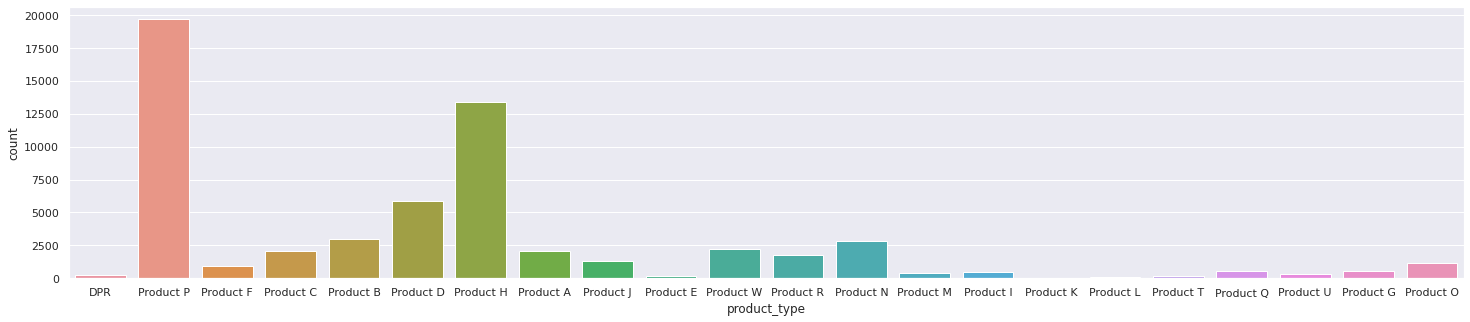

In [145]:
# Checking the feature "ordered_item_quantity" 

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.countplot("product_type", data=positive_orders, ax=axes)
plt.show()

In [146]:
# Checking the "customer_id" to get the idea of customers who have bought the most n terms of quantity

positive_orders.groupby("customer_id")["net_quantity"].sum().sort_values(ascending=False).reset_index()

,customer_id,net_quantity
0,2028611,39
1,8325158,37
2,6578818,36
3,7843272,31
4,4509306,28
...,...,...
24856,5897230,1
24857,5896691,1
24858,5896428,1
24859,5896258,1


In [147]:
# Checking the "customer_id" to get the idea of customers who have bought prodcuct_types

positive_orders.groupby(["customer_id"])["product_type"].nunique().sort_values(ascending=False)

customer_id
6917110    13
6704021    12
7843272    12
5929625    11
7061357    10
           ..
6221417     1
6220705     1
6219709     1
6219400     1
1000661     1
Name: product_type, Length: 24861, dtype: int64

##### Observations:

1. The net quantities that were bought ranged from 1 to 6 items.
2. The customer id 2028611, 8325158 and 6578818 have ordered the most no. of items.
3. Product P and Product H are the two product types that were ordered the most no. of times.
4. Customer ids 6917110, 6704021, 7843272 and 5929625 have ordered more than 10 different product types.

In [148]:
# Checking the total sum of sales value

print("The total sum of sales value is : ", positive_orders["total_sales"].sum())

The total sum of sales value is :  4757035.3


In [149]:
# Checking the "customer_id" to get the idea of total_sales value 

positive_orders.groupby("customer_id")["net_sales"].sum().sort_values(ascending=False).reset_index()

,customer_id,net_sales
0,8325158,2609.7600
1,2028611,2456.5300
2,6578818,2185.2900
3,7843272,2106.4600
4,8032770,1955.1400
...,...,...
24856,4121004,0.0000
24857,9325878,0.0000
24858,2864696,0.0000
24859,1312378,0.0000


In [150]:
# Checking the "product_type" to get the idea of total_sales value per product type

positive_orders.groupby("product_type")["net_sales"].sum().sort_values(ascending=False).reset_index()

,product_type,net_sales
0,Product P,1376317.7800
1,Product H,876499.4700
2,Product D,380746.7400
3,Product B,214695.7300
4,Product A,207871.4500
5,Product W,149553.0600
6,Product C,143525.1500
7,Product J,127337.0900
8,Product N,107185.2200
9,Product F,84583.6600


##### Observations:

1. The total sales value generated by the ordered items is over 4M+.
2. Out of all 24861 customers, Custormer ID 8325158, 2028611, 6578818 and 7843272 are the ones who spent more than 2K on the purchases.
3. Out of all 22 Product Types, Product P generated a sales value of 1.3M+.

In [151]:
# Grouping data by day to calculate the days with highest total sales

total_sales_by_day = positive_orders.groupby("day")["total_sales"].sum().reset_index().sort_values(by=["total_sales"], ascending=False)
total_sales_by_day.head()

,day,total_sales
32,2018-11-23,174702.1500
35,2018-11-26,130455.5500
55,2018-12-26,96130.5000
84,2019-02-01,94816.6000
33,2018-11-24,83193.9500


In [152]:
# Grouping data by day to calculate the days with highest total sales

gross_sales_by_day = positive_orders.groupby("day")["gross_sales"].sum().reset_index().sort_values(by=["gross_sales"], ascending=False)
gross_sales_by_day.head()

,day,gross_sales
32,2018-11-23,179320.0600
35,2018-11-26,135346.6100
33,2018-11-24,85951.7700
55,2018-12-26,83141.4200
84,2019-02-01,81588.5400


##### Observations:

Biggest sales happened around:
  - 23-26th of November, 2018: Days around black Friday, where people are promoted to do shopping massively with crazy discount rates.
  - 26th of December 2018: Christmas Eve and afterwards, holiday season shows its effects even after the New Year's with high sales.
It makes sense since these dates corresponds to gift and shopping seasons.
  - 1st of February 2019

Gross sales could give an alternative picture for this question, since it does not take into account the final amount after discounts, returns and tax. 

It also reflects how discounts affects purchasing decisions.



In [153]:
positive_orders.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,2018-04-12,2,200.0000,-200.0000,0.0000,0.0000,0.0000,0.0000,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,2019-01-04,2,190.0000,-190.0000,0.0000,0.0000,0.0000,0.0000,0,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,2019-02-19,1,119.0000,-119.0000,0.0000,0.0000,0.0000,0.0000,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,2019-02-19,1,119.0000,-119.0000,0.0000,0.0000,0.0000,0.0000,0,1
5,OTH,Product F,40 / B / FtO,53-5CA-7CF-8F5-9-28CB78B,43823868,4121004,53616575668264,2019-02-19,1,119.0000,-119.0000,0.0000,0.0000,0.0000,0.0000,0,1


---

**4. Average Return Rate**

It is the ratio of returned item quantity and ordered item quantity. This ratio is first calculated per order and then averaged for all orders of a customer.


In [154]:
# Filtering the records based on "ordered_item_quantity"

orders_with_item_quantity = orders[orders["ordered_item_quantity"] > 0]

In [155]:
# Checking the qunatities ordered and returned based on order id and customer id

orders_by_order_id = orders_with_item_quantity.groupby(by=["customer_id", "order_id"])["total_sales", "returned_item_quantity", "ordered_item_quantity"].sum() \
                      .reset_index().sort_values(by=["total_sales"], ascending=False)
orders_by_order_id["average_return_rate"] = (-1 * orders_by_order_id["returned_item_quantity"] / orders_by_order_id["ordered_item_quantity"])    

In [156]:
# Sorting based on "returned_item_quantity" to see the customers and orders with highest returns

returned_item_per_order = orders_by_order_id.sort_values(by=["returned_item_quantity"], ascending=True)
print("The no. of order id with returns : ", len(returned_item_per_order[returned_item_per_order["returned_item_quantity"] < 0]))
returned_item_per_order.head(10)

The no. of order id with returns :  56


,customer_id,order_id,total_sales,returned_item_quantity,ordered_item_quantity,average_return_rate
2284,1506787,96198860807601,0.0000,-4,4,1.0000
39460,9533448,73094559597229,0.0000,-3,3,1.0000
12033,3619130,88025805105285,0.0000,-2,2,1.0000
9661,3140571,78551331388985,0.0000,-2,2,1.0000
12985,3845533,64457579606151,0.0000,-2,2,1.0000
23436,6032447,37989464252413,604.0000,-2,10,0.2000
13599,3975135,58401319422273,0.0000,-2,2,1.0000
8884,2953344,41328715058313,0.0000,-2,2,1.0000
12671,3773168,92946294166379,0.0000,-2,2,1.0000
31761,7861225,25892289756158,0.0000,-2,2,1.0000


##### Observations:

1. There are 56 order ids in which customers have returned items.
2. Order id 96198860807601 shows that all 4 bought products were returned.

In [157]:
# Finding the average return rate for each customer

orders_by_customer = orders_with_item_quantity.groupby(by=["customer_id"])["total_sales", "returned_item_quantity", "ordered_item_quantity"].sum() \
                      .reset_index().sort_values(by=["total_sales"], ascending=False)
orders_by_customer["average_return_rate"] = (-1 * orders_by_customer["returned_item_quantity"] / orders_by_customer["ordered_item_quantity"])    

In [158]:
# Sorting based on "returned_item_quantity" to see the customers with highest returns

return_rate_by_customer =  orders_by_customer.sort_values(by=["average_return_rate"], ascending=False)
print("The no. customers with average return rate greater than 0 is : ", len(return_rate_by_customer[return_rate_by_customer["average_return_rate"] > 0]), " out of : ", len(return_rate_by_customer), " cutomers")
return_rate_by_customer.head(15)

The no. customers with average return rate greater than 0 is :  51  out of :  24874  cutomers


,customer_id,total_sales,returned_item_quantity,ordered_item_quantity,average_return_rate
1379,1506787,0.0000,-4,4,1.0000
14474,6290724,0.0000,-1,1,1.0000
7107,3615546,0.0000,-1,1,1.0000
7116,3619130,0.0000,-2,2,1.0000
22416,9201837,0.0000,-1,1,1.0000
9210,4390300,0.0000,-1,1,1.0000
20453,8478804,0.0000,-1,1,1.0000
7461,3756958,0.0000,-1,1,1.0000
7503,3773168,0.0000,-2,2,1.0000
22054,9078757,0.0000,-2,2,1.0000


##### Observations:

1. There are 13 customer ids with 100% return rate, thereby generating no revenue.
2. There are total of 51 customer ids with positive return rate out of 24874 customers.


---

**5. Analysis of Gross Price, Discounts and Taxes**

In [159]:
# Grouping product types to determine highly priced products

pricey_product = positive_orders.groupby(by=["product_type"])["net_quantity", "gross_sales", "total_sales"].sum().reset_index()
pricey_product["price_per_item"] = pricey_product["gross_sales"] / pricey_product["net_quantity"]
pricey_product = pricey_product.sort_values(by=["price_per_item"], ascending=False)
pricey_product.head()

,product_type,net_quantity,gross_sales,total_sales,price_per_item
1,Product A,2122,227563.7800,248815.5700,107.2402
6,Product F,904,89984.6900,101254.9500,99.5406
10,Product J,1295,128760.9000,152400.3700,99.4293
5,Product E,183,18147.9700,21043.4900,99.1692
0,DPR,285,27974.0000,27381.2000,98.1544


##### Observations:

1. Product A seems to cost the most for one unit on an average at 107.25.
2. Product F, J and E also cost around 99 on an average.

In [160]:
# Grouping product types to determine heavily discounted products

discounted_product = positive_orders.groupby(by=["product_type"])["net_quantity", "gross_sales", "discounts"].sum().reset_index()
discounted_product["discount_per_item"] = -1 * discounted_product["discounts"] / discounted_product["net_quantity"]
discounted_product = discounted_product.sort_values(by=["discount_per_item"], ascending=False)
discounted_product.head()

,product_type,net_quantity,gross_sales,discounts,discount_per_item
1,Product A,2122,227563.7800,-19692.3300,9.2801
21,Product W,2235,165394.3700,-15841.3100,7.0878
8,Product H,13496,968305.6600,-91806.1900,6.8025
16,Product P,19941,1510524.5700,-134206.7900,6.7302
2,Product B,3003,234080.6200,-19384.8900,6.4552


##### Observations:
1. Even though, Product P and Product H sells more quantities, but the average discount per unit is still highest for Product A and Product W.

In [161]:
# Grouping product types to determine heavily taxed products

taxed_product = positive_orders.groupby(by=["product_type"])["net_quantity", "net_sales", "taxes"].sum().reset_index()
taxed_product["tax_per_item"] = taxed_product["taxes"] / taxed_product["net_quantity"]
taxed_product = taxed_product.sort_values(by=["tax_per_item"], ascending=False)
taxed_product.head()

,product_type,net_quantity,net_sales,taxes,tax_per_item
10,Product J,1295,127337.0900,25063.2800,19.3539
1,Product A,2122,207871.4500,40944.1200,19.2951
5,Product E,183,17536.5200,3506.9700,19.1638
6,Product F,904,84583.6600,16671.2900,18.4417
9,Product I,500,37955.9500,7440.6000,14.8812


##### Observations:

1. Product J, A, E, F are the heavily taxed products which is evident from their average tax per unit.
2. Interestingly, Product E and F have sold less than 1000 units.

### **3.3 Feature Engineering**



#### **3.3.0 Dropping Irrelevant Records**

In [163]:
def FilterOutNegativeTransactionIfFirst(df):

    while 1:
        # Sorted the orders by each customer and then by day.
        sorted_orders = df.sort_values(by=["customer_id", "day"])

        # Extracted the first record for each customer
        first_order = sorted_orders.drop_duplicates(subset="customer_id", keep="first")

        # Filtered the customers with first transaction as returns in the dataset.
        filtered_first_order = first_order[first_order["returned_item_quantity"] < 0]
        filtered_first_order = filtered_first_order[filtered_first_order["net_quantity"] < 0] 

        if len(filtered_first_order) == 0:
            return df
        
        # Dropping those records so that the dataset has greater than or equal to 0 as net quantity
        df = df.drop(filtered_first_order.index.tolist()).reset_index(drop=True)

In [164]:
# Filtering dataset such that for each customer, the first transaction is either order or order & return

filtered_orders = FilterOutNegativeTransactionIfFirst(orders.copy())

In [165]:
print("The no. of records in the filtered dataset is : ", len(filtered_orders))
print("The no. of records in the original dataset is : ", len(orders))

The no. of records in the filtered dataset is :  67166
The no. of records in the original dataset is :  70052


In [171]:
orders = filtered_orders

In [172]:
orders.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,2018-04-12,2,200.0000,-200.0000,0.0000,0.0000,0.0000,0.0000,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,2019-01-04,2,190.0000,-190.0000,0.0000,0.0000,0.0000,0.0000,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,2018-05-11,0,164.8000,-156.5600,-8.2400,0.0000,0.0000,0.0000,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,2019-02-19,1,119.0000,-119.0000,0.0000,0.0000,0.0000,0.0000,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,2019-02-19,1,119.0000,-119.0000,0.0000,0.0000,0.0000,0.0000,0,1


##### Observations:

1. We have dropped close to 3K records.
2. Since the dataset is sample, before extracting the features, for every customer if the first transaction in the dataset is the "return" one, then it would affect our summations as they would be returning a product but the transaction for its original order would be missing.
3. This might impact calculation for total sales, hence we needed to filter the data suct that every customer has a positive net quantity as th first transaction.  

### **3.3.1 Feature Extraction**

In [173]:
# Reference Day to calculate recency

max_date = orders["day"].max()

In [174]:
# Extracting unique customers oriented data

customers = orders.groupby(by=["customer_id"])["product_type"].nunique().reset_index()
customers = customers.merge(orders.groupby(by=["customer_id"])["ordered_item_quantity"].sum().reset_index(), on="customer_id")
customers = customers.merge(orders.groupby(by=["customer_id"])["returned_item_quantity"].sum().reset_index(), on="customer_id")
customers = customers.merge(orders.groupby(by=["customer_id"])["total_sales"].sum().reset_index(), on="customer_id")
customers = customers.merge(orders.groupby(by=["customer_id"])["day"].max().reset_index(), on="customer_id")
customers = customers.merge(orders.groupby(by=["customer_id"])["day"].min().reset_index(), on="customer_id")
customers.columns = ["customer_id", "unique_product_type", "ordered_item_quantity", "returned_item_quantity", "net_spent", "last_purchase", "first_purchase"]

In [175]:
# Calculating recency and tenure for each customer

customers["recency"] = customers["last_purchase"].apply(lambda x: (max_date - x).days)
customers["tenure"] = customers["first_purchase"].apply(lambda x: (max_date - x).days)

In [176]:
# Checking for customer id who have returned more than or equal to what they have ordered

print("The count of customer ids who have returned more than or equal to what they have ordered : ", customers[customers["ordered_item_quantity"] <= customers["returned_item_quantity"]*(-1)].shape)
customers = customers[customers["ordered_item_quantity"] > customers["returned_item_quantity"]*(-1)]

The count of customer ids who have returned more than or equal to what they have ordered :  (1357, 9)


In [177]:
# Finding the average return rate for each customer

customers["average_return_rate"] = (-1 * customers["returned_item_quantity"] / customers["ordered_item_quantity"])    

In [178]:
# Dropping datetime features

customers["returned_item_quantity"] = -1 * customers["returned_item_quantity"]
customers.drop(["last_purchase", "first_purchase"], axis=1, inplace=True)

In [179]:
customers.head()

,customer_id,unique_product_type,ordered_item_quantity,returned_item_quantity,net_spent,recency,tenure,average_return_rate
0,1000661,1,3,0,260.0000,376,376,0.0000
1,1001914,1,1,0,79.2000,376,376,0.0000
2,1002167,3,3,1,167.4500,33,374,0.3333
3,1002387,1,1,0,89.0000,262,262,0.0000
4,1002419,2,2,0,103.0000,186,186,0.0000


In [180]:
customers.describe()

,customer_id,unique_product_type,ordered_item_quantity,returned_item_quantity,net_spent,recency,tenure,average_return_rate
count,23517.0000,23517.0000,23517.0000,23517.0000,23517.0000,23517.0000,23517.0000,23517.0000
mean,653349780297.6702,1.7700,2.4633,0.2484,175.7415,268.9601,327.1206,0.0572
std,6524393591273.5820,1.1062,2.2022,0.8164,148.8103,127.3266,124.9822,0.1549
min,1000661.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,3293614.0000,1.0000,1.0000,0.0000,85.5000,218.0000,254.0000,0.0000
50%,5571966.0000,1.0000,2.0000,0.0000,129.0000,276.0000,335.0000,0.0000
75%,7848357.0000,2.0000,3.0000,0.0000,216.9000,345.0000,376.0000,0.0000
max,99549917598660.0000,13.0000,39.0000,22.0000,2304.3000,692.0000,692.0000,0.9091


In [181]:
# Saving a copy of the df

customers.reset_index(drop=True, inplace=True)
df_customers = customers.copy()

#### **3.3.2 Feature Transformation**

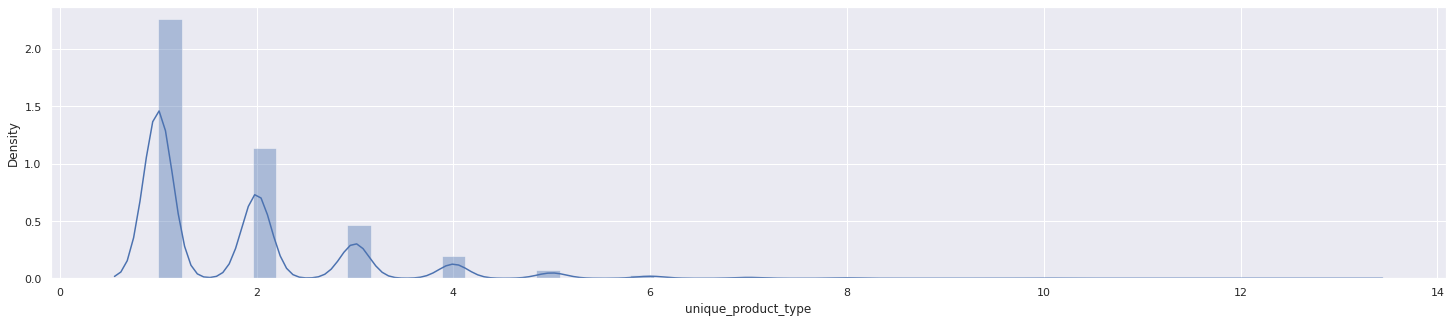

In [184]:
# Visualize feature distributions

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(customers["unique_product_type"], ax=axes)

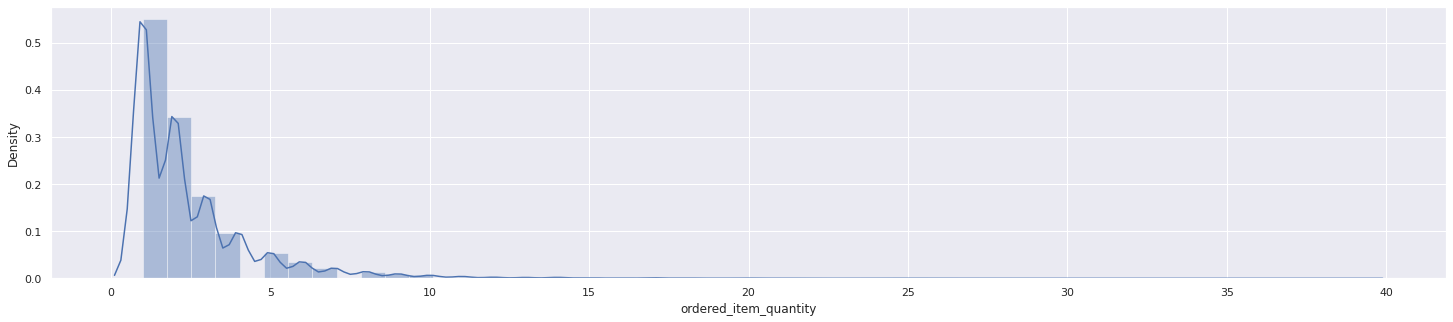

In [185]:
# Visualize feature distributions

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(customers["ordered_item_quantity"], ax=axes)

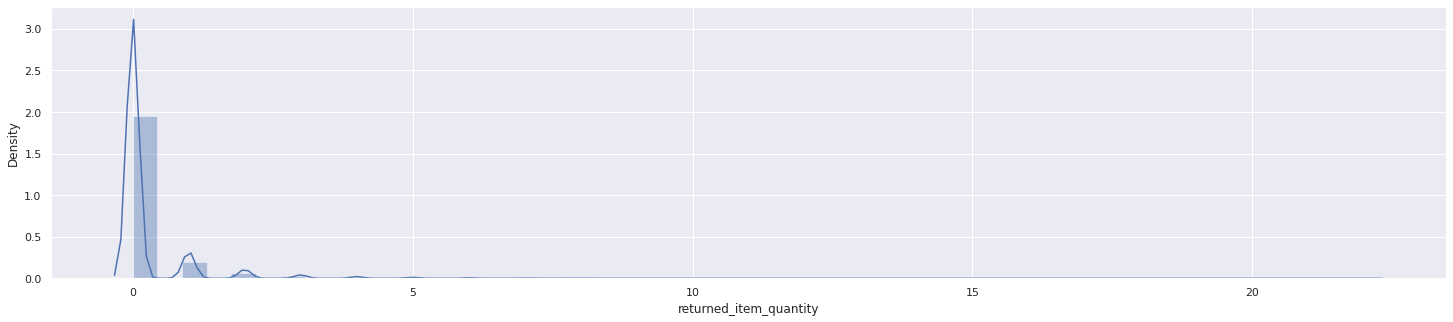

In [186]:
# Visualize feature distributions

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(customers["returned_item_quantity"], ax=axes)

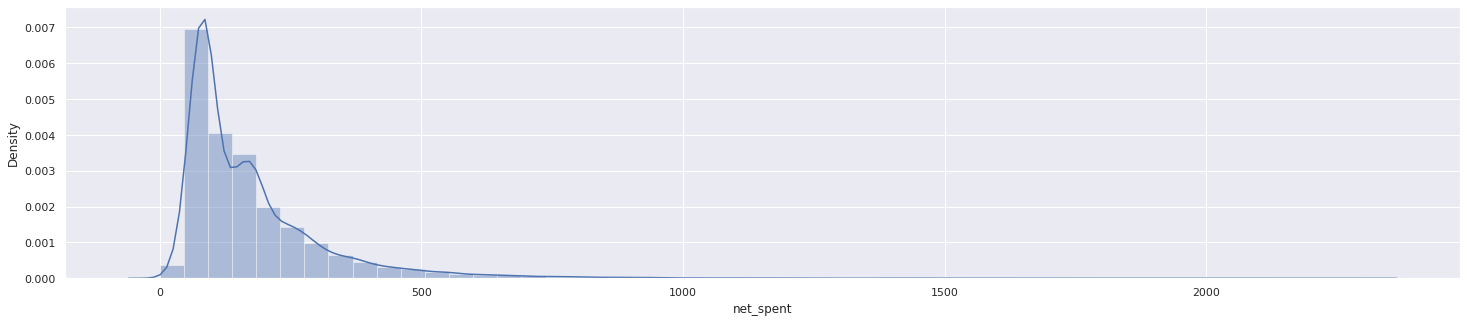

In [187]:
# Visualize feature distributions

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(customers["net_spent"], ax=axes)

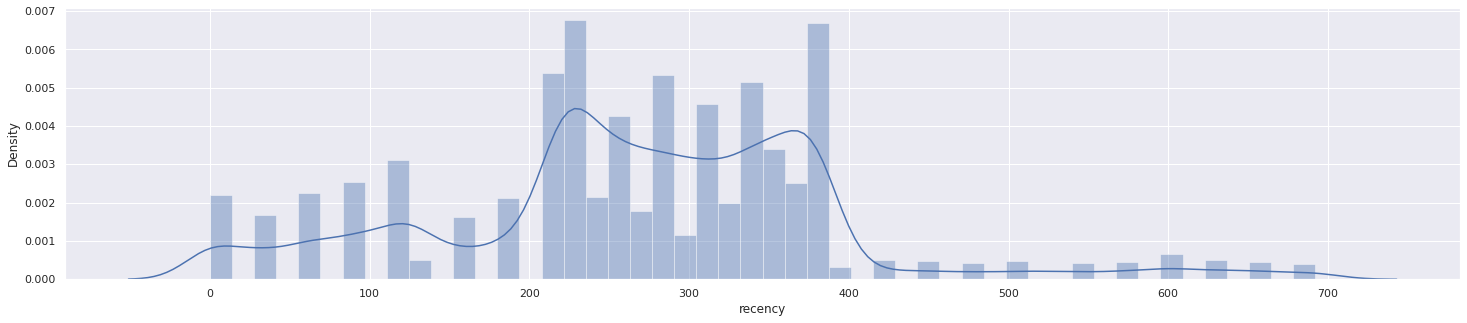

In [188]:
# Visualize feature distributions

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(customers["recency"], ax=axes)

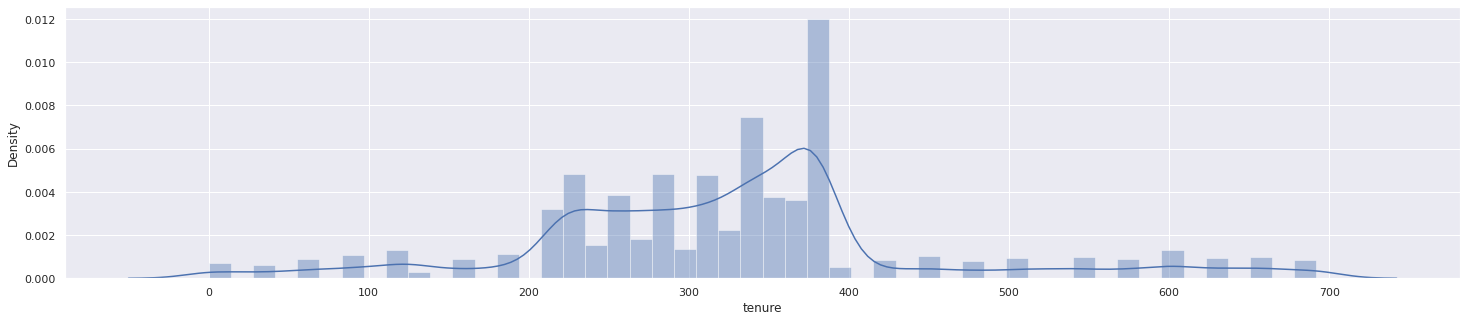

In [189]:
# Visualize feature distributions

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(customers["tenure"], ax=axes)

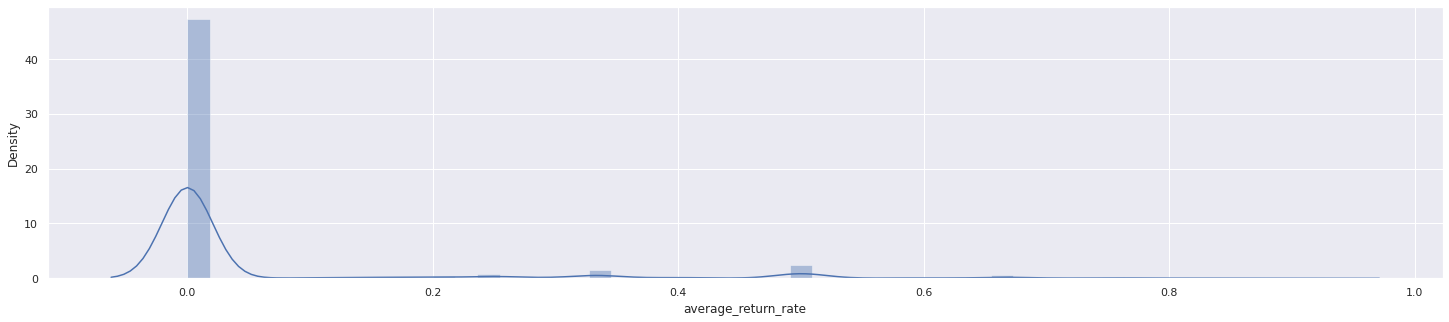

In [190]:
# Visualize feature distributions

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(customers["average_return_rate"], ax=axes)

In [191]:
customers.head()

,customer_id,unique_product_type,ordered_item_quantity,returned_item_quantity,net_spent,recency,tenure,average_return_rate
0,1000661,1,3,0,260.0000,376,376,0.0000
1,1001914,1,1,0,79.2000,376,376,0.0000
2,1002167,3,3,1,167.4500,33,374,0.3333
3,1002387,1,1,0,89.0000,262,262,0.0000
4,1002419,2,2,0,103.0000,186,186,0.0000


##### Observations:

1. The features like "unique_product_type", "ordered_item_quantity" and "returned_item_quantity" are ordinal features which are right-skewed.
2. "net_spent" is continuous feature which is also right-skewed, so we may need apply some transformations.
3. "recency" and "tenure" are count of days and are somewhat normal features.
4. "average_return_rate" is also right-skewed and needs some transformations.

In [192]:
# Applying log transform

customers["net_spent_log"] = np.log1p(customers["net_spent"]+0.000001)
customers["average_return_rate_log"] = np.log1p(customers["average_return_rate"])

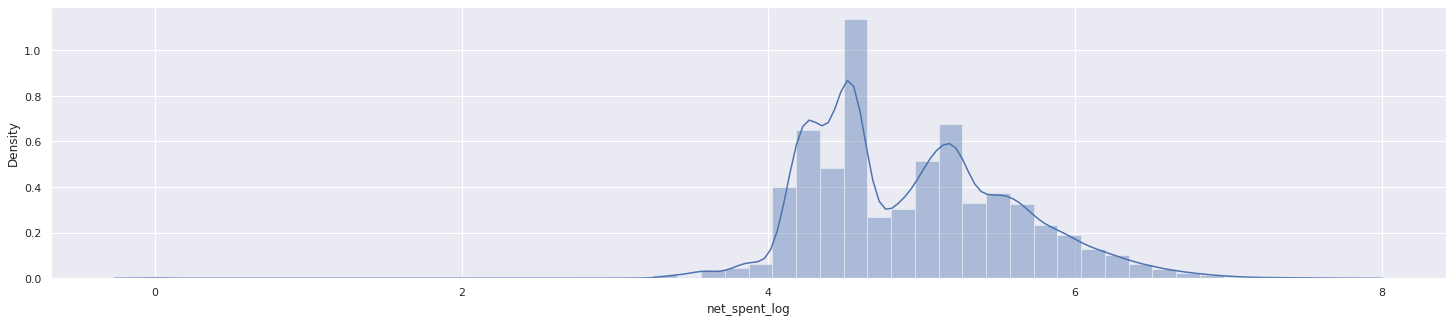

In [193]:
# Visualize feature distributions

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(customers["net_spent_log"], ax=axes)

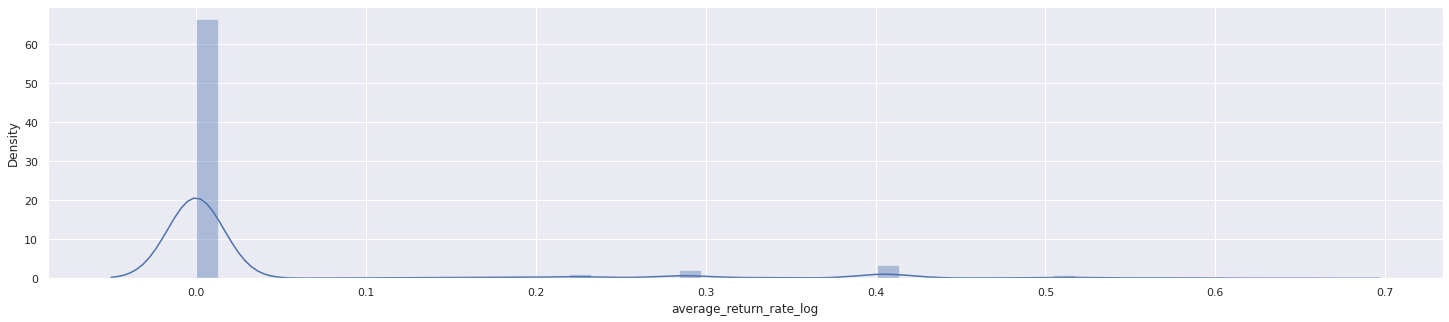

In [194]:
# Visualize feature distributions

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(customers["average_return_rate_log"], ax=axes)

#### **3.3.3 Feature Selection**

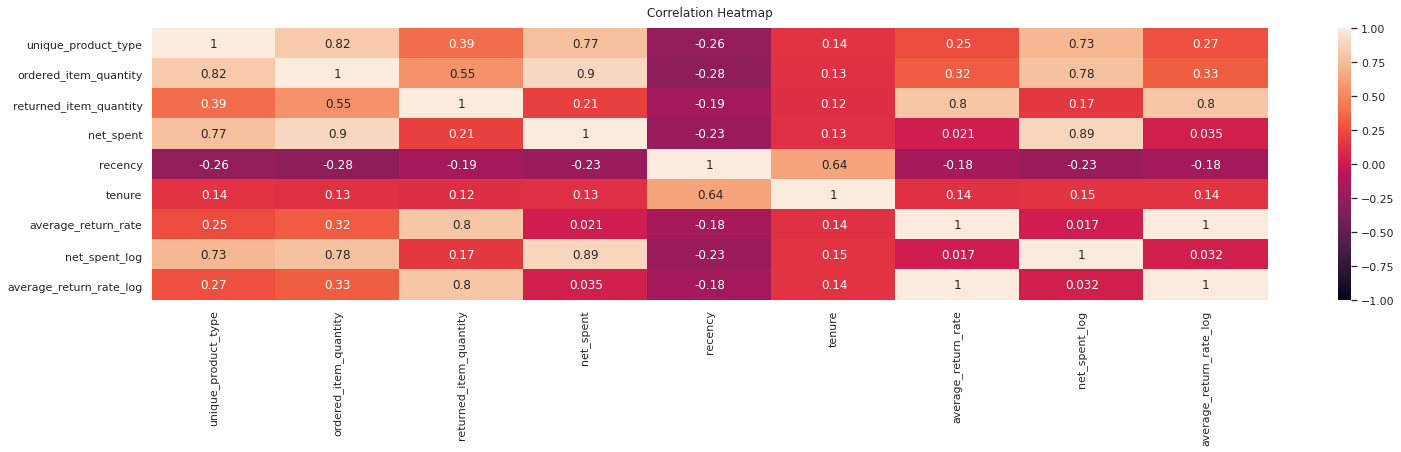

In [195]:
# Visualizing the correlation matrix

plt.figure(figsize=(25, 5))
heatmap = sns.heatmap(customers.drop("customer_id", axis=1).corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

##### Observations:

1. "ordered_item_quantity" is highly correlated with "unique_product_type" and "net_spent".
2. "returned_item_quantity" is highly correlated with "average_return_rate".
3. "net_spent" is highly correlated with "unique_product_type" and "ordered_item_quantity".
4. There is no significant strong correlations for "recency" and "tenure".
5. "average_return_rate" is highly correlated with "returned_item_quantity".

In [196]:
# Dropping "returned_quantity_item" as "average_return_rate" is representing it

customers.drop(["returned_item_quantity", "net_spent", "average_return_rate"], axis=1, inplace=True)

#### **3.3.4 Feature Scaling**

In [197]:
# Creating MinMaxScaler object

scaling = MinMaxScaler()

In [198]:
# Applying MinMaxScaling

customers[customers.columns] = scaling.fit_transform(customers[customers.columns])

## **4. Model Buliding**

We can now proceed to apply KMeans Clustering to segment the customers.

In [199]:
# Dropping customer_id and creating the df

X = customers.drop("customer_id", axis=1)

### **4.1 Model Creation with Hyper-parameter Optimization**

In [200]:
# Create initial K-means model

kmeans_model = KMeans(init='k-means++', max_iter=500, random_state=42)

In [201]:
kmeans_model.fit(X.values)

# print the sum of distances from all examples to the center of the cluster
print("within-cluster sum-of-squares (inertia) of the model is:", kmeans_model.inertia_)

within-cluster sum-of-squares (inertia) of the model is: 633.0921528911832


In [206]:
# Function to apply various "K" and calculating the inertia

def make_list_of_K(K, dataframe):  

    cluster_values = list(range(1, K+1))
    inertia_values=[]
    
    for c in cluster_values:
        model = KMeans(
            n_clusters = c, 
            init='k-means++', 
            max_iter=500, 
            random_state=42)
        model.fit(dataframe)
        inertia_values.append(model.inertia_)
    
    return inertia_values

In [208]:
# save inertia values in a dataframe for k values between 1 to 15 

results = make_list_of_K(15, X)
k_values_distances = pd.DataFrame({"clusters": list(range(1, 16)), "within cluster sum of squared distances": results})

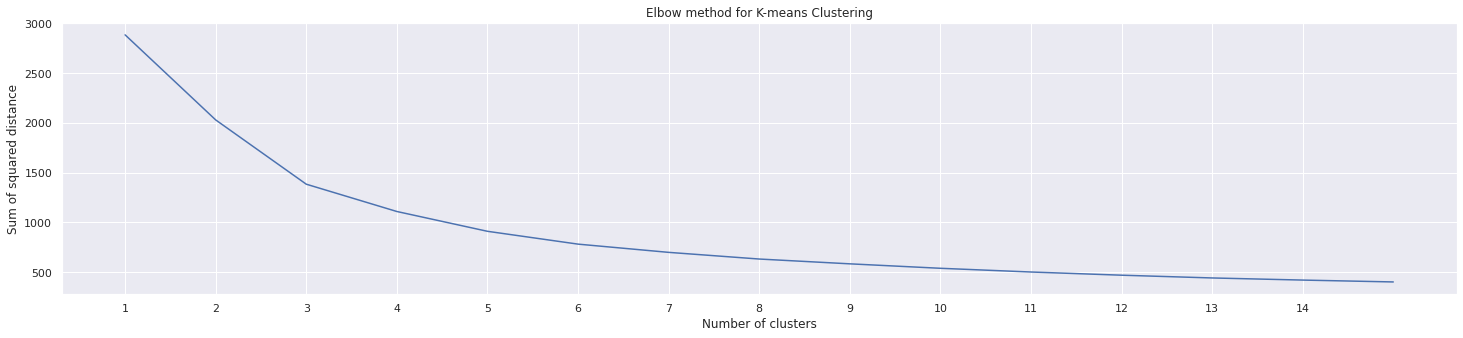

In [210]:
# Elbow method
plt.figure(figsize=(25, 5))

sns.lineplot(x="clusters", y="within cluster sum of squared distances", data=k_values_distances)
plt.title("Elbow method for K-means Clustering")
plt.ylabel("Sum of squared distance")
plt.xlabel("Number of clusters")
plt.xticks(range(1, 15), range(1, 15));

##### Observations:

1. Using the Elbow method, ideal value of K looks like to 4 or 5.

In [240]:
# Creating clustering model with optimal k=5

final_model = KMeans(n_clusters = 4, init='k-means++', max_iter=500, random_state=42)
df_customers["Cluster"] = final_model.fit_predict(X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f4e3644e0>,
      dtype=object)

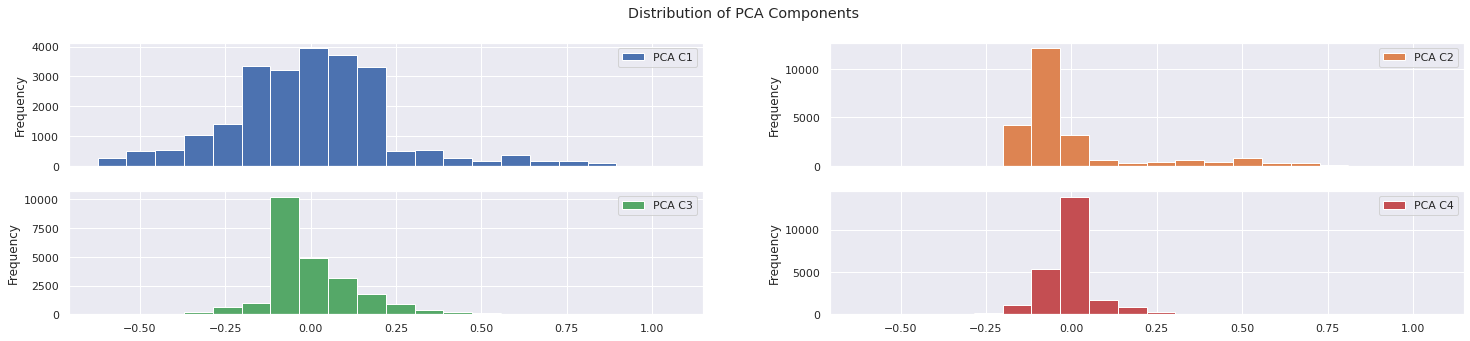

In [241]:
# PCA with 4 components after hit and try method

pca = PCA(n_components=4, random_state=0)
X_pca = pd.DataFrame(pca.fit_transform(X), columns=["PCA C" + str(i) for i in range(1, 5)])
X_pca.plot(kind='hist', bins=20, figsize=(25, 5), subplots=True, layout=(2, 2), title='Distribution of PCA Components')

In [242]:
print("The sum of explained variance is :", pca.explained_variance_ratio_.sum())

The sum of explained variance is : 0.9798794778530359


In [243]:
# Assigning the cluster labels

X_pca["cluster"] = df_customers["Cluster"]

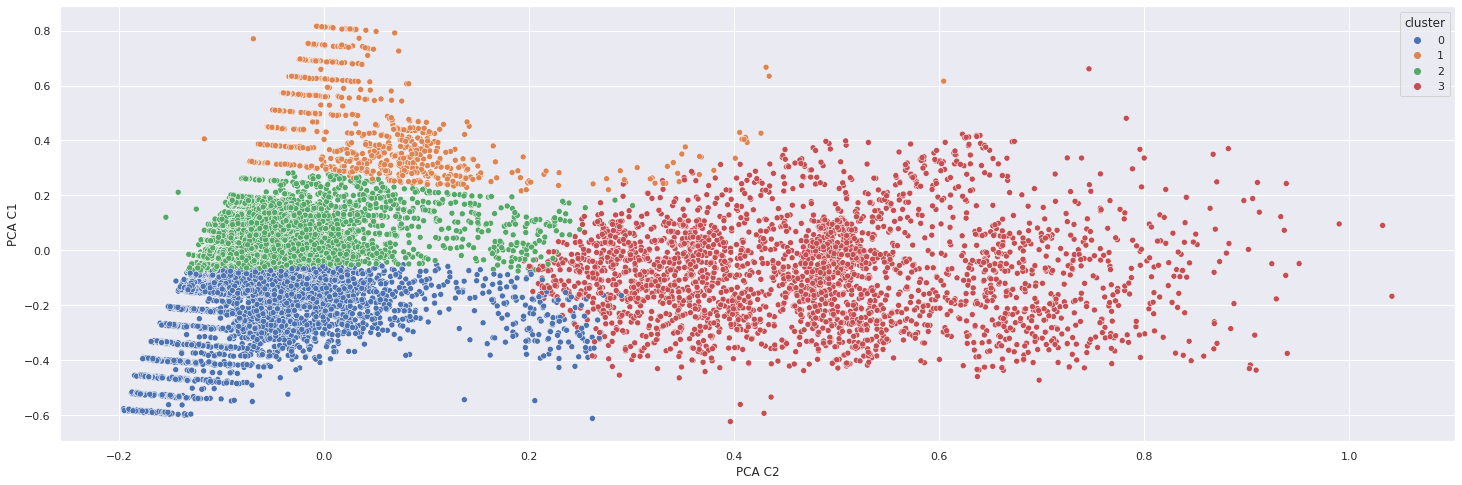

In [244]:
# Create a scatter plot
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 8), sharey=True)
sns.scatterplot(x="PCA C2", y="PCA C1", data=X_pca, hue= "cluster", palette="deep")

In [263]:
# Calculating the customers count per cluster

cardinality_df = pd.DataFrame(df_customers["Cluster"].value_counts().reset_index())
cardinality_df.rename(columns={"index": "Customer Groups", "Cluster": "Customer Group Magnitude"}, inplace=True)
cardinality_df["PCT"] = cardinality_df["Customer Group Magnitude"] / cardinality_df["Customer Group Magnitude"].sum()
cardinality_df = pd.merge(cardinality_df, df_customers.groupby("Cluster")["net_spent"].sum(), how="left", left_on="Customer Groups", right_on="Cluster")
cardinality_df

,Customer Groups,Customer Group Magnitude,PCT,net_spent
0,2,11349,0.4826,1772449.7100
1,0,7282,0.3096,1419298.1800
2,3,3059,0.1301,652993.9500
3,1,1827,0.0777,288170.6000


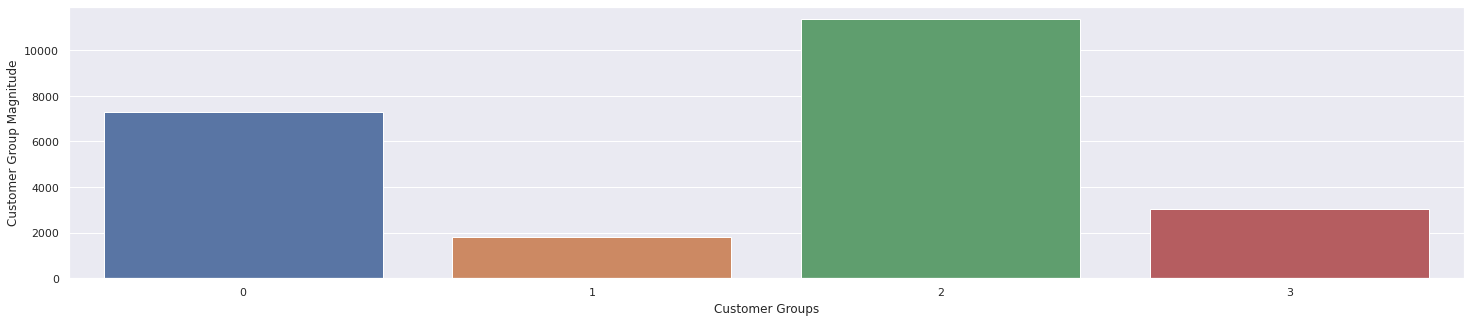

In [257]:
# Checking the feature "net_quantity" 

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.barplot(x="Customer Groups", y="Customer Group Magnitude", data=cardinality_df, ax=axes)
plt.show()

##### Observations:

The overall strategy would be preserving the most favourable customer group — the Green one.

Green group (2) is 42% of all customers, any improvements achieved in this customer group will dramatically increase the revenue. Eliminating high return rates and offering gift cards can move this customer group to low-average-return-rate and high-total-spending area. If we assume that they are newcomers, gift cards can expedite their come-back.

Blue group (0) consists of 50% of all customers. They are showing the same characteristics from the average return rate and products ordered perspectives but differ from total spending. These groups can be defined as who already know the brand and orders multiple products. Those customers can be kept up-to-date with the brand with some specialized communications and discounts.

Orange and Red groups can be targetted for better offers to get better revenues.


In [216]:
df_customers.head()

,customer_id,unique_product_type,ordered_item_quantity,returned_item_quantity,net_spent,recency,tenure,average_return_rate,Cluster
0,1000661,1,3,0,260.0000,376,376,0.0000,0
1,1001914,1,1,0,79.2000,376,376,0.0000,0
2,1002167,3,3,1,167.4500,33,374,0.3333,1
3,1002387,1,1,0,89.0000,262,262,0.0000,0
4,1002419,2,2,0,103.0000,186,186,0.0000,3


## **5. Conclusion**

We approached customer segmentation problem from a behavioural aspect with the number of products ordered, average return rate and total spending for each customer. Use of 3 features helped us with the understandability and visualization of the model.

All in all, the dataset was apt to perform an unsupervised machine learning problem. At first, we only had customers data with order information and did not know if they belonged to any group. With the K-means clustering, patterns in the data were found and extended further into groups. We carved out strategies for the formed groups, making meaning out of a dataset that is a dust cloud initially.